<a href="https://colab.research.google.com/github/alvarezpablo/fen-trabajo-final/blob/master/Trabajo_Diplomado_Data_analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import scipy.stats as stats
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


#1. ID: identificador del cliente.
#2. Genero: Genero del cliente.
#3. Renta: Renta en pesos.
#4. Edad: Edad en años.
#5. NIV_Educ: Nivel educacional.
#6. E_Civil: Estado civil.
#7. COD_Ofi: Código de la oficina
#8. COD_Com: Código de la comuna.
#9. Ciudad: Ciudad de la oficina.
#10. D_Marzo: Deuda de Marzo.
#11. D_Abril: Deuda de Abril.
#12. D_Mayo: Deuda de Mayo.
#13. D_Junio: Deuda de Junio.
#14. D_Julio: Deuda de Julio.
#15. D_Agosto: Deuda de Agosto.
#16. D_Septiembre: Deuda de Septiembre.
#17. M_Moroso: Meses en Mora.
#18. Monto: Monto preaprobado.
#19. Seguro: Seguro de gravamen.
#20. Fuga: variable objetivo.

#Archivo de Datos de Entrenamiento en Github

dataTrain = "https://raw.githubusercontent.com/alvarezpablo/fen-trabajo-final/master/BASEFUGA_GENERAL.csv"
#supress scientifc notation dataframe
pd.set_option('display.float_format', lambda x: '%.5f' % x)
dfTrain = pd.read_csv(dataTrain)




In [0]:
dfTrain.head(10)

,ID,GENERO,RENTA,EDAD,NIV_EDUC,E_CIVIL,COD_OFI,COD_COM,CIUDAD,D_Marzo,D_Abril,D_Mayo,D_Junio,D_Julio,D_Agosto,D_Septiembre,M_MOROSO,MONTO,SEGURO,FUGA
0,1,M,746476,39.00000,MED,CAS,68,213.00000,LOS ANGELES,0,38292,0,434357,1766,9110,340,2,2000000,NO,NO FUGA
1,2,F,11901,49.00000,MED,VIU,16,89.00000,SANTIAGO,0,0,0,0,48,0,0,1,7500000,SI,NO FUGA
2,3,M,1651421,39.00000,TEC,CAS,90,16.00000,ANTOFAGASTA,0,604169,0,0,323,26489,2925,1,8000000,NO,NO FUGA
3,4,F,638969,36.00000,UNV,CAS,85,115.00000,SANTIAGO,0,5125,0,198998,94,0,105,1,2600000,NO,NO FUGA
4,5,M,860113,44.00000,TEC,CAS,45,80.00000,SANTIAGO,0,11946,0,73959,149,0,272,1,6400000,NO,NO FUGA
5,6,M,329463,40.00000,TEC,CAS,53,92.00000,SANTIAGO,0,187538,0,12008,641,118,154,2,7700000,NO,FUGA
6,7,M,28732,45.00000,UNV,CAS,55,90.00000,SANTIAGO,559984,532706,0,0,1464,15600,1523,1,2900000,NO,FUGA
7,8,F,11563,41.00000,TEC,SOL,47,112.00000,SANTIAGO,0,141317,0,525325,13,0,477,1,2100000,SI,NO FUGA
8,9,F,3044549,33.00000,MED,CAS,22,1.00000,ARICA,0,102078,0,0,44,0,0,1,1600000,NO,NO FUGA
9,10,F,3632707,39.00000,MED,VIU,27,89.00000,SANTIAGO,0,162658,0,445896,865,0,907,1,2800000,NO,NO FUGA


## Resumen estadisticas variable númericas

In [0]:
dfTrain.describe()

,ID,RENTA,EDAD,COD_OFI,COD_COM,D_Marzo,D_Abril,D_Mayo,D_Junio,D_Julio,D_Agosto,D_Septiembre,M_MOROSO,MONTO
count,2294.00000,2294.00000,2292.00000,2294.00000,2291.00000,2294.00000,2294.00000,2294.00000,2294.00000,2294.00000,2294.00000,2294.00000,2294.00000,2294.00000
mean,1147.50000,852756.26591,43.55192,68.54272,107.94500,153020.64255,272681.03008,103231.53139,189976.06277,566.84874,3578.76068,1940.63949,1.25022,3477092.41500
std,662.36508,1379715.20942,8.87551,40.16477,84.77303,498187.53725,402325.68769,870698.44221,670504.22781,1075.32939,8942.38321,9868.81684,0.75191,2292933.04668
min,1.00000,176.00000,-50.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,500000.00000
25%,574.25000,100381.50000,39.00000,31.00000,80.00000,0.00000,17674.25000,0.00000,0.00000,7.00000,0.00000,0.00000,1.00000,1700000.00000
50%,1147.50000,369934.50000,44.00000,56.00000,90.00000,0.00000,134474.50000,0.00000,5502.00000,146.00000,0.00000,56.00000,1.00000,2600000.00000
75%,1720.75000,826758.25000,50.00000,92.00000,118.00000,0.00000,374425.00000,0.00000,174906.00000,629.75000,1486.25000,497.25000,2.00000,4800000.00000
max,2294.00000,8454317.00000,130.00000,155.00000,516.00000,9458161.00000,5495534.00000,18396961.00000,20634612.00000,11187.00000,88837.00000,249652.00000,3.00000,8000000.00000


## Exploracion variables categoricas

Resumen estadisticas variable categóricas

In [0]:
dfTrain.describe(include = ['O'])

,GENERO,NIV_EDUC,E_CIVIL,CIUDAD,SEGURO,FUGA
count,2283,2283,2283,2291,2294,2294
unique,2,5,4,75,2,2
top,M,UNV,CAS,SANTIAGO,NO,NO FUGA
freq,1385,947,1429,1389,1816,1157


Verificando valores de variables categóricas

In [0]:
cat_columns=['GENERO','NIV_EDUC','E_CIVIL','CIUDAD','SEGURO','FUGA']
for c in cat_columns:
  print(c)
  print(dfTrain[c].unique())
  print('\n')

GENERO
['M' 'F' nan]


NIV_EDUC
['MED' 'TEC' 'UNV' 'BAS' nan 'EUN']


E_CIVIL
['CAS' 'VIU' 'SOL' 'SEP' nan]


CIUDAD
['LOS ANGELES' 'SANTIAGO' 'ANTOFAGASTA' 'ARICA' 'CONCEPCION' 'TALCAHUANO'
 'TEMUCO' 'RANCAGUA' 'CHUQUICAMATA' 'PUERTO OCTAY' 'CALAMA' 'PUNTA ARENAS'
 'CON-CON' 'VLLA ALEMANA' 'OSORNO' 'IQUIQUE' 'VINA DEL MAR' 'TALAGANTE'
 'LA SERENA' 'SAN FELIPE' 'RENGO' 'CASTRO' 'CHILLAN' 'COLBUN' 'PENAFLOR'
 'VALDIVIA' 'EL SALVADOR' 'COYHAIQUE' 'ANCUD' 'COQUIMBO' 'LONCOCHE'
 'CURICO' 'LOS ANDES' 'SAN CLEMENTE' nan 'PALENA' 'LLANQUIHUE' 'LLO-LLEO'
 'SAN PABLO' 'QUILPUE' 'CALDERA' 'MELIPILLA' 'TALCA' 'SAN FERNANDO'
 'PUERTO MONTT' 'QUILLOTA' 'VALPARAISO' 'LA CALERA' 'STO DOMINGO'
 'CURACAVI' 'AYSEN' 'LOS VILOS' 'PANGUIPULLI' 'CORONEL' 'COPIAPO'
 'PUERTO VARAS' 'LINARES' 'SAN PEDRO' 'TOCOPILLA' 'ANGOL' 'PARRAL'
 'SAN ESTEBAN' 'HIJUELAS' 'SAN ANTONIO' 'MACHALI' 'VALLENAR' 'CALBUCO'
 'SANTA CRUZ' 'HUASCO' 'LOS LAGOS' 'VILLARRICA' 'LA CRUZ' 'PETORCA'
 'OVALLE' 'DONIHUE' 'PENCO']


SEGURO
['N

In [0]:
print("Value counts\n")
for c in cat_columns:
  print(c)
  print(dfTrain[c].value_counts())
  print('\n')

Value counts

GENERO
M    1385
F     898
Name: GENERO, dtype: int64


NIV_EDUC
UNV    947
TEC    698
MED    615
EUN     12
BAS     11
Name: NIV_EDUC, dtype: int64


E_CIVIL
CAS    1429
SOL     642
SEP     114
VIU      98
Name: E_CIVIL, dtype: int64


CIUDAD
SANTIAGO        1389
ARICA            234
CONCEPCION       152
ANTOFAGASTA       47
VINA DEL MAR      42
                ... 
OVALLE             1
SAN CLEMENTE       1
LOS LAGOS          1
SAN PABLO          1
LOS VILOS          1
Name: CIUDAD, Length: 75, dtype: int64


SEGURO
NO    1816
SI     478
Name: SEGURO, dtype: int64


FUGA
NO FUGA    1157
FUGA       1137
Name: FUGA, dtype: int64




## Analisis de nulos

In [0]:

dfTrain.isnull().sum()

ID               0
GENERO          11
RENTA            0
EDAD             2
NIV_EDUC        11
E_CIVIL         11
COD_OFI          0
COD_COM          3
CIUDAD           3
D_Marzo          0
D_Abril          0
D_Mayo           0
D_Junio          0
D_Julio          0
D_Agosto         0
D_Septiembre     0
M_MOROSO         0
MONTO            0
SEGURO           0
FUGA             0
dtype: int64


## Recodificacion de variables

In [0]:

dfTrain['E_CIVIL_COD'] = dfTrain['E_CIVIL'].replace({'SEP': 'SOL', 'VIU': 'SOL'})
dfTrain['NIV_EDUC_COD'] = dfTrain['NIV_EDUC'].replace({'MED': 'COL', 'BAS': 'COL', 'TEC': 'UNV', 'EUN': 'UNV' })
dfTrain['FUGA_COD'] = dfTrain['FUGA'].replace({'NO FUGA':0, 'FUGA':1 })
dfTrain['CIUDAD_COD'] = dfTrain['CIUDAD'].replace({'NO FUGA':0, 'FUGA':1 })
dfTrain['log_RENTA'] = np.log(dfTrain['RENTA'])
dfTrain['RATIO_DEUDA'] =    (dfTrain['D_Marzo']+dfTrain['D_Abril']+dfTrain['D_Mayo']+dfTrain['D_Junio']+dfTrain['D_Julio']+dfTrain['D_Agosto']+dfTrain['D_Septiembre'] +1 ) / 7  / dfTrain['RENTA'] 



In [0]:
dfTrain.head(10)

,ID,GENERO,RENTA,EDAD,NIV_EDUC,E_CIVIL,COD_OFI,COD_COM,CIUDAD,D_Marzo,D_Abril,D_Mayo,D_Junio,D_Julio,D_Agosto,D_Septiembre,M_MOROSO,MONTO,SEGURO,FUGA,E_CIVIL_COD,NIV_EDUC_COD,FUGA_COD,CIUDAD_COD,log_RENTA,RATIO_DEUDA
0,1,M,746476,39.00000,MED,CAS,68,213.00000,LOS ANGELES,0,38292,0,434357,1766,9110,340,2,2000000,NO,NO FUGA,CAS,COL,0,LOS ANGELES,13.52312,0.09260
1,2,F,11901,49.00000,MED,VIU,16,89.00000,SANTIAGO,0,0,0,0,48,0,0,1,7500000,SI,NO FUGA,SOL,COL,0,SANTIAGO,9.38438,0.00059
2,3,M,1651421,39.00000,TEC,CAS,90,16.00000,ANTOFAGASTA,0,604169,0,0,323,26489,2925,1,8000000,NO,NO FUGA,CAS,UNV,0,ANTOFAGASTA,14.31715,0.05484
3,4,F,638969,36.00000,UNV,CAS,85,115.00000,SANTIAGO,0,5125,0,198998,94,0,105,1,2600000,NO,NO FUGA,CAS,UNV,0,SANTIAGO,13.36761,0.04568
4,5,M,860113,44.00000,TEC,CAS,45,80.00000,SANTIAGO,0,11946,0,73959,149,0,272,1,6400000,NO,NO FUGA,CAS,UNV,0,SANTIAGO,13.66482,0.01434
5,6,M,329463,40.00000,TEC,CAS,53,92.00000,SANTIAGO,0,187538,0,12008,641,118,154,2,7700000,NO,FUGA,CAS,UNV,1,SANTIAGO,12.70522,0.08692
6,7,M,28732,45.00000,UNV,CAS,55,90.00000,SANTIAGO,559984,532706,0,0,1464,15600,1523,1,2900000,NO,FUGA,CAS,UNV,1,SANTIAGO,10.26577,5.52534
7,8,F,11563,41.00000,TEC,SOL,47,112.00000,SANTIAGO,0,141317,0,525325,13,0,477,1,2100000,SI,NO FUGA,SOL,UNV,0,SANTIAGO,9.35557,8.24221
8,9,F,3044549,33.00000,MED,CAS,22,1.00000,ARICA,0,102078,0,0,44,0,0,1,1600000,NO,NO FUGA,CAS,COL,0,ARICA,14.92886,0.00479
9,10,F,3632707,39.00000,MED,VIU,27,89.00000,SANTIAGO,0,162658,0,445896,865,0,907,1,2800000,NO,NO FUGA,SOL,COL,0,SANTIAGO,15.10549,0.02400


Graficando matriz de correlacion (variables numéricas)

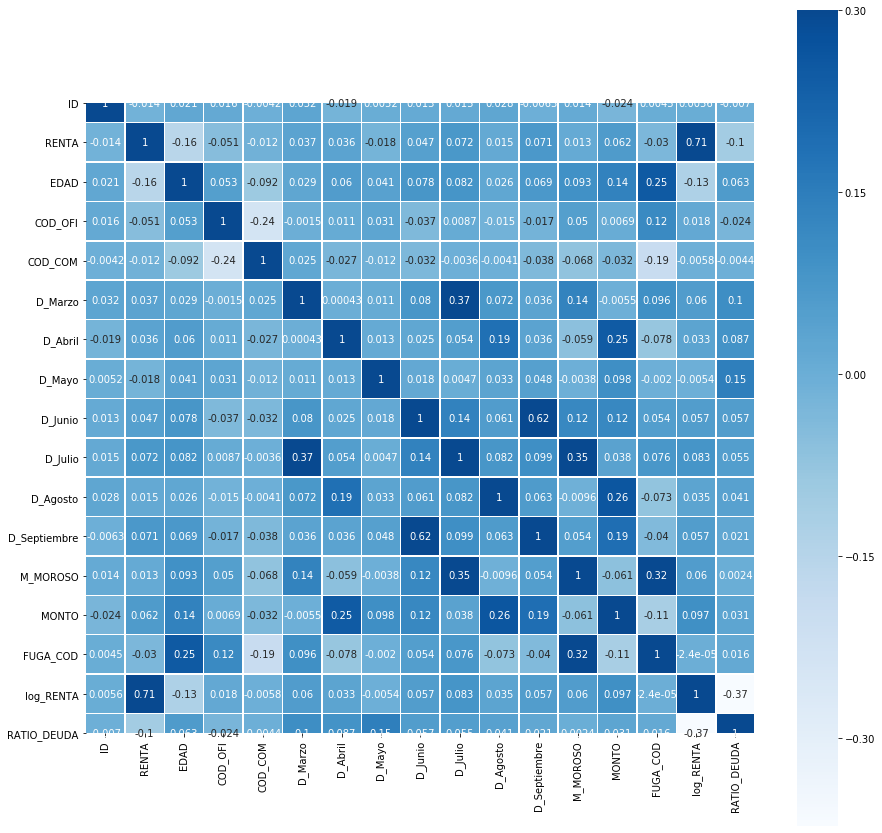

In [0]:
corr=dfTrain.corr()

plt.figure(figsize=(15,15))
sns.heatmap(corr,  vmax=.3, center=0,
            square=True, linewidths=.5,cmap='Blues', annot=True)

## Variable Genero

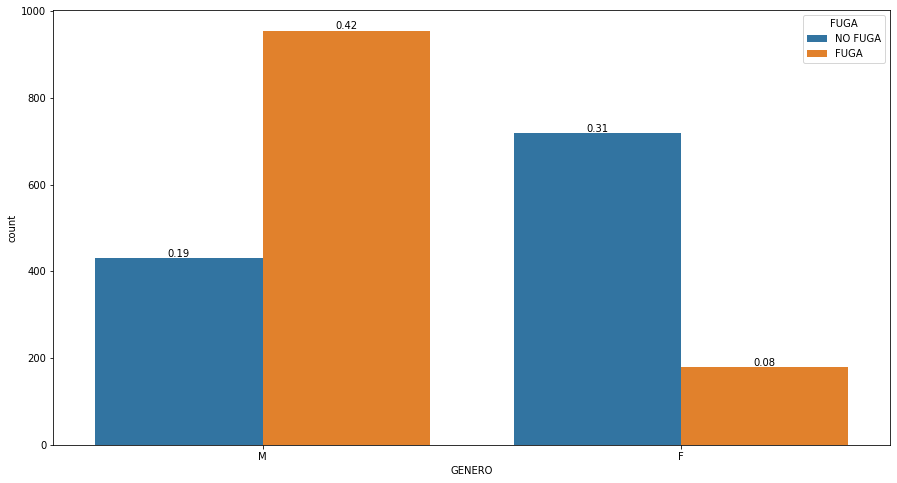

In [0]:
total = float(len(dfTrain)) # one person per row 
plt.figure(figsize=(15,8))
ax=sns.countplot(x="GENERO", hue="FUGA", data=dfTrain)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center") 
plt.show()

## Variable Estado Civil

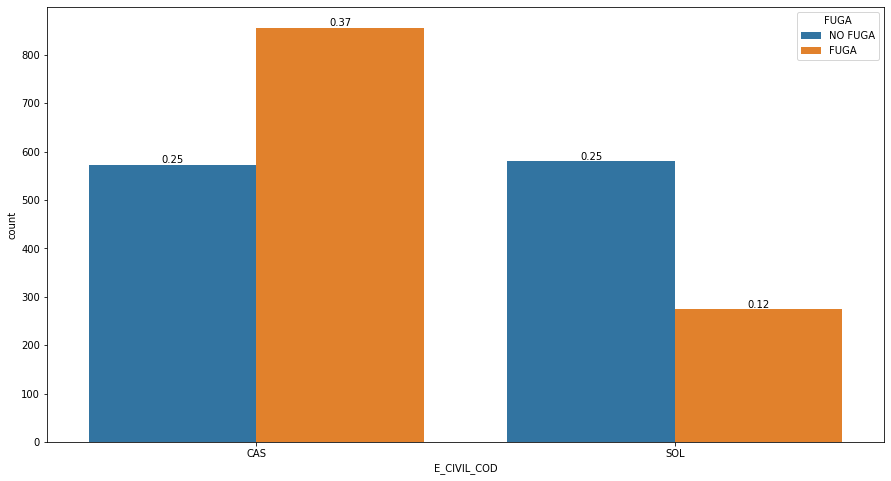

In [0]:
plt.figure(figsize=(15,8))
ax=sns.countplot(x="E_CIVIL_COD", hue="FUGA", data=dfTrain)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center") 
plt.show()

## Variable Nivel Educacional

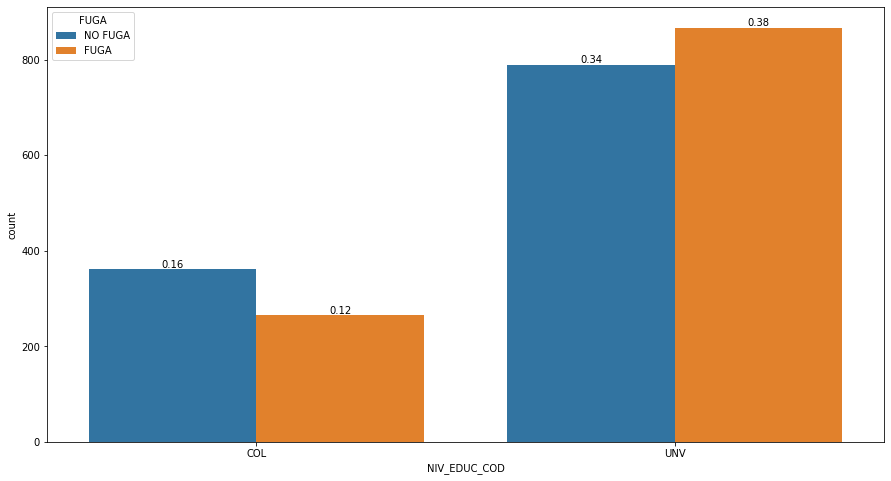

In [0]:
plt.figure(figsize=(15,8))
ax=sns.countplot(x="NIV_EDUC_COD", hue="FUGA", data=dfTrain)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center") 
plt.show()

## Variable Seguro

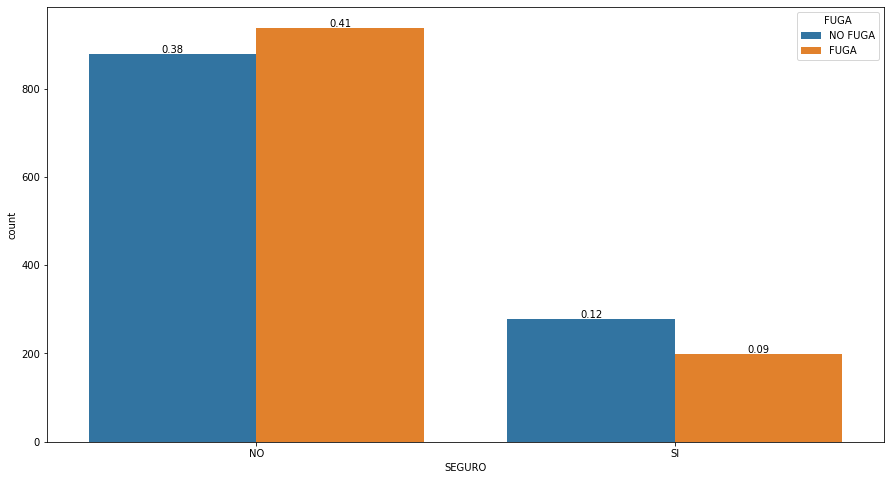

In [0]:
plt.figure(figsize=(15,8))
ax=sns.countplot(x="SEGURO", hue="FUGA", data=dfTrain)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center") 
plt.show()

## Variable Renta

count      2294.00000
mean     852756.26591
std     1379715.20942
min         176.00000
25%      100381.50000
50%      369934.50000
75%      826758.25000
max     8454317.00000
Name: RENTA, dtype: float64

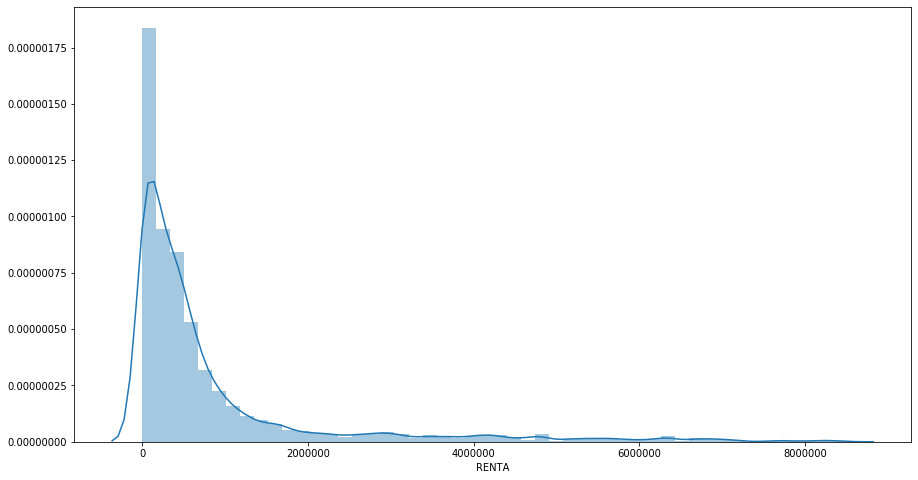

In [0]:
plt.figure(figsize=(15,8))
#supress scientifc notation from plots
plt.ticklabel_format(style='plain', axis='x')
sns.distplot(dfTrain['RENTA'])
dfTrain['RENTA'].describe()

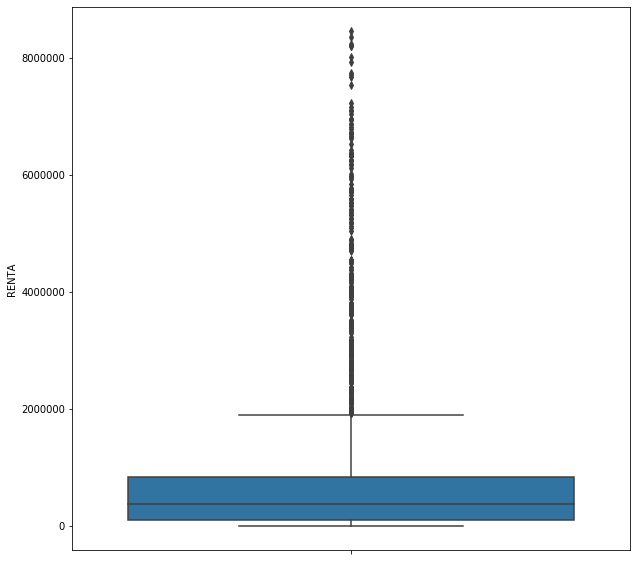

In [0]:
plt.figure(figsize=(10,10))
sns.boxplot(y=dfTrain['RENTA'])

### Renta percentil 1

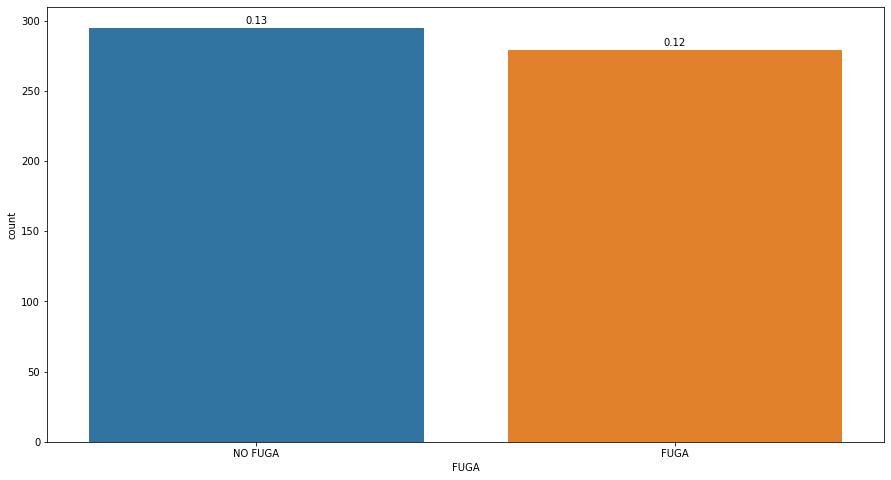

filas: 574


In [0]:

renta_seg1=dfTrain[dfTrain['RENTA']<=100381.5]
#renta_seg1.head()
#renta_seg1.count()
plt.figure(figsize=(15,8))
ax=sns.countplot(x="FUGA",  data=renta_seg1)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center") 
plt.show()

print('filas:', len(renta_seg1))


### Renta percentil 2

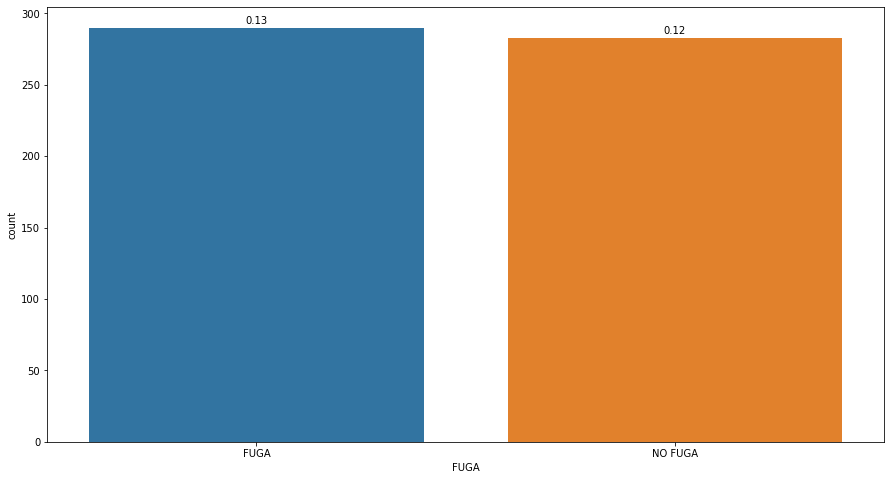

filas: 573


In [0]:

renta_seg2=dfTrain[(dfTrain['RENTA']>100381.5) & (dfTrain['RENTA']<=369934.5)]
#renta_seg1.head()
#renta_seg1.count()
plt.figure(figsize=(15,8))
ax=sns.countplot(x="FUGA",  data=renta_seg2)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center") 
plt.show()
print('filas:', len(renta_seg2))

### Renta percentil 3

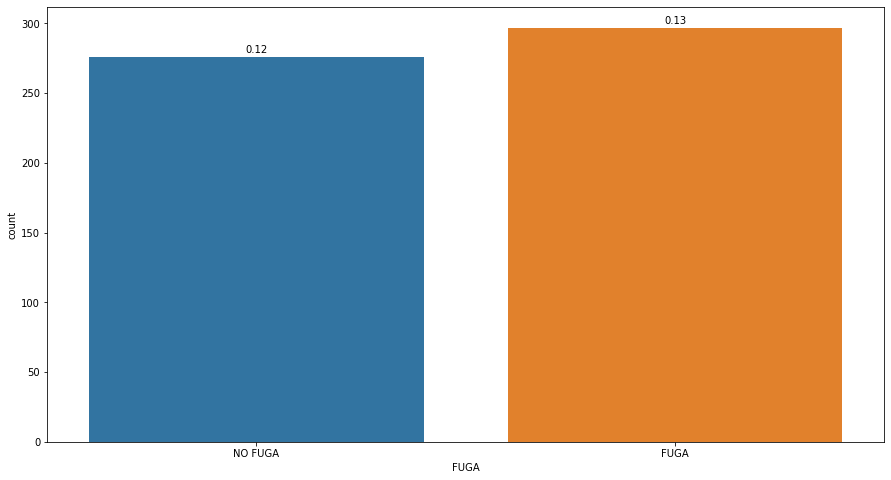

filas: 573


In [0]:
renta_seg3=dfTrain[(dfTrain['RENTA']<=826758.25) & (dfTrain['RENTA']>369934.5)]
#renta_seg1.head()
#renta_seg1.count()
plt.figure(figsize=(15,8))
ax=sns.countplot(x="FUGA",  data=renta_seg3)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center") 
plt.show()

print('filas:', len(renta_seg3))

### Renta percentil 4

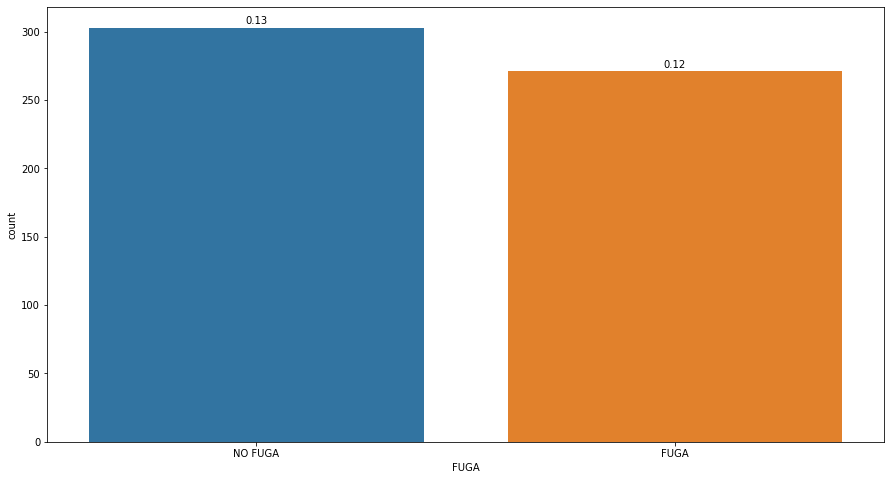

filas: 574


In [0]:
renta_seg4=dfTrain[dfTrain['RENTA']>826758.25]
#renta_seg1.head()
#renta_seg1.count()
plt.figure(figsize=(15,8))
ax=sns.countplot(x="FUGA",  data=renta_seg4)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center") 
plt.show()
print('filas:', len(renta_seg4))

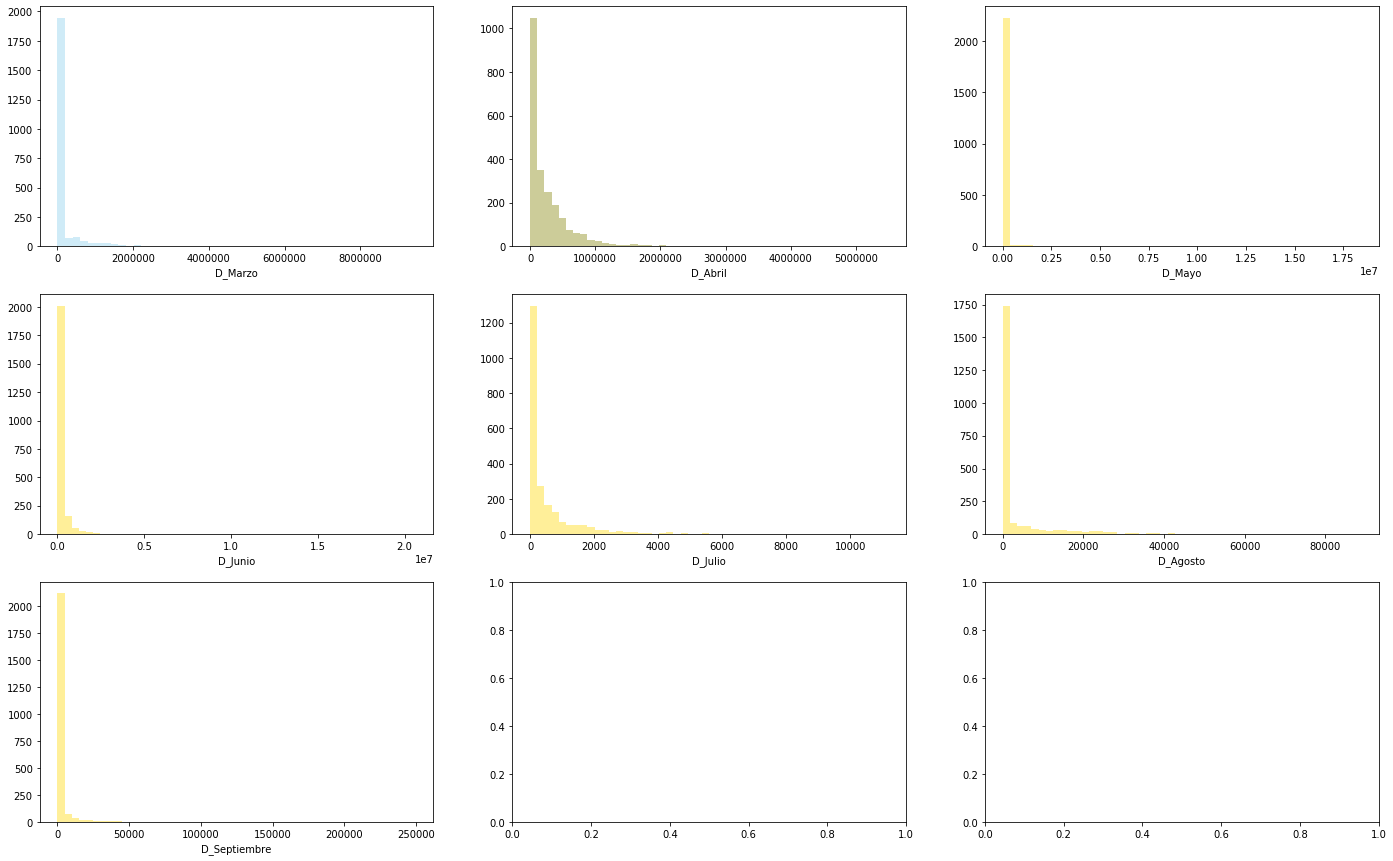

In [0]:

f,axes = plt.subplots(3,3, figsize=(24,15))

sns.distplot( dfTrain["D_Marzo"], kde=False, color="skyblue", ax=axes[0][0])
sns.distplot( dfTrain["D_Abril"], kde=False, color="olive", ax=axes[0][1])
sns.distplot( dfTrain["D_Mayo"], kde=False, color="gold", ax=axes[0][2])
sns.distplot( dfTrain["D_Junio"], kde=False, color="gold", ax=axes[1][0])
sns.distplot( dfTrain["D_Julio"], kde=False, color="gold", ax=axes[1][1])
sns.distplot( dfTrain["D_Agosto"], kde=False, color="gold", ax=axes[1][2])
sns.distplot( dfTrain["D_Septiembre"], kde=False, color="gold", ax=axes[2][0])

#supress scientifc notation from plots
plt.ticklabel_format(style='plain', axis='x')


## Variable Monto



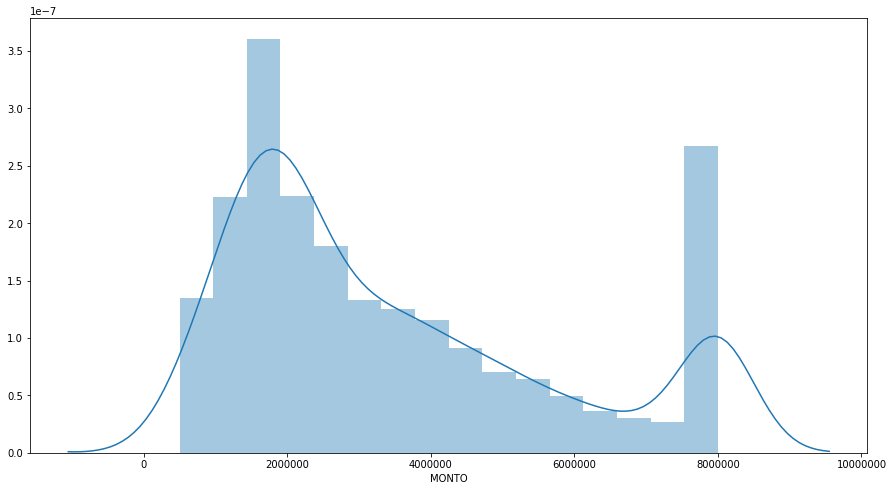

In [0]:

plt.figure(figsize=(15,8))
sns.distplot(dfTrain['MONTO'])
dfTrain['MONTO'].describe()
#supress scientifc notation from plots
plt.ticklabel_format(style='plain', axis='x')

## Variable Cod Oficina

count   2294.00000
mean      68.54272
std       40.16477
min        0.00000
25%       31.00000
50%       56.00000
75%       92.00000
max      155.00000
Name: COD_OFI, dtype: float64

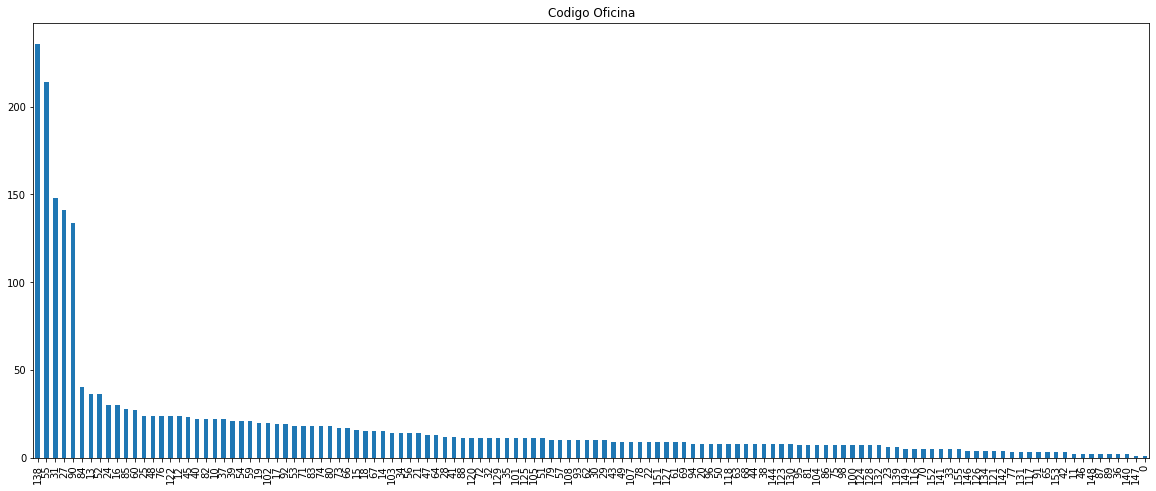

In [0]:

plt.figure(figsize=(20,8))

dfTrain['COD_OFI'].value_counts().plot(kind='bar').set_title('Codigo Oficina')
dfTrain['COD_OFI'].describe()
#supress scientifc notation from plots
#plt.ticklabel_format(style='plain', axis='x')

## Variable Cod Comuna

count   2291.00000
mean     107.94500
std       84.77303
min        1.00000
25%       80.00000
50%       90.00000
75%      118.00000
max      516.00000
Name: COD_COM, dtype: float64

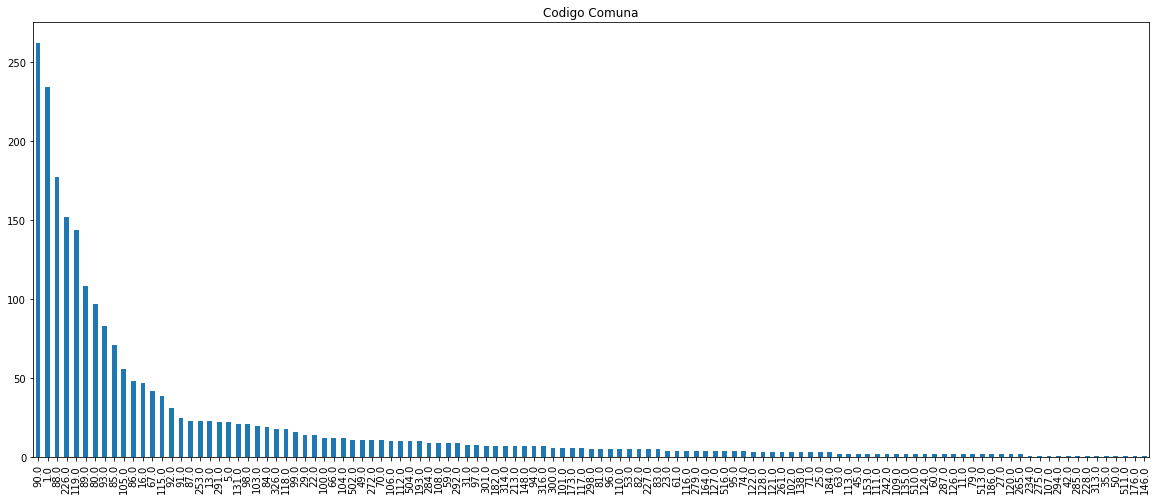

In [0]:
plt.figure(figsize=(20,8))

dfTrain['COD_COM'].value_counts().plot(kind='bar').set_title('Codigo Comuna')
dfTrain['COD_COM'].describe()
#supress scientifc notation from plots
#plt.ticklabel_format(style='plain', axis='x')

[Text(0, 0, 'LOS ANGELES'),
 Text(0, 0, 'SANTIAGO'),
 Text(0, 0, 'ANTOFAGASTA'),
 Text(0, 0, 'ARICA'),
 Text(0, 0, 'CONCEPCION'),
 Text(0, 0, 'TALCAHUANO'),
 Text(0, 0, 'TEMUCO'),
 Text(0, 0, 'RANCAGUA'),
 Text(0, 0, 'CHUQUICAMATA'),
 Text(0, 0, 'PUERTO OCTAY'),
 Text(0, 0, 'CALAMA'),
 Text(0, 0, 'PUNTA ARENAS'),
 Text(0, 0, 'CON-CON'),
 Text(0, 0, 'VLLA ALEMANA'),
 Text(0, 0, 'OSORNO'),
 Text(0, 0, 'IQUIQUE'),
 Text(0, 0, 'VINA DEL MAR'),
 Text(0, 0, 'TALAGANTE'),
 Text(0, 0, 'LA SERENA'),
 Text(0, 0, 'SAN FELIPE'),
 Text(0, 0, 'RENGO'),
 Text(0, 0, 'CASTRO'),
 Text(0, 0, 'CHILLAN'),
 Text(0, 0, 'COLBUN'),
 Text(0, 0, 'PENAFLOR'),
 Text(0, 0, 'VALDIVIA'),
 Text(0, 0, 'EL SALVADOR'),
 Text(0, 0, 'COYHAIQUE'),
 Text(0, 0, 'ANCUD'),
 Text(0, 0, 'COQUIMBO'),
 Text(0, 0, 'LONCOCHE'),
 Text(0, 0, 'CURICO'),
 Text(0, 0, 'LOS ANDES'),
 Text(0, 0, 'SAN CLEMENTE'),
 Text(0, 0, 'PALENA'),
 Text(0, 0, 'LLANQUIHUE'),
 Text(0, 0, 'LLO-LLEO'),
 Text(0, 0, 'SAN PABLO'),
 Text(0, 0, 'QUILPUE'),
 Text(

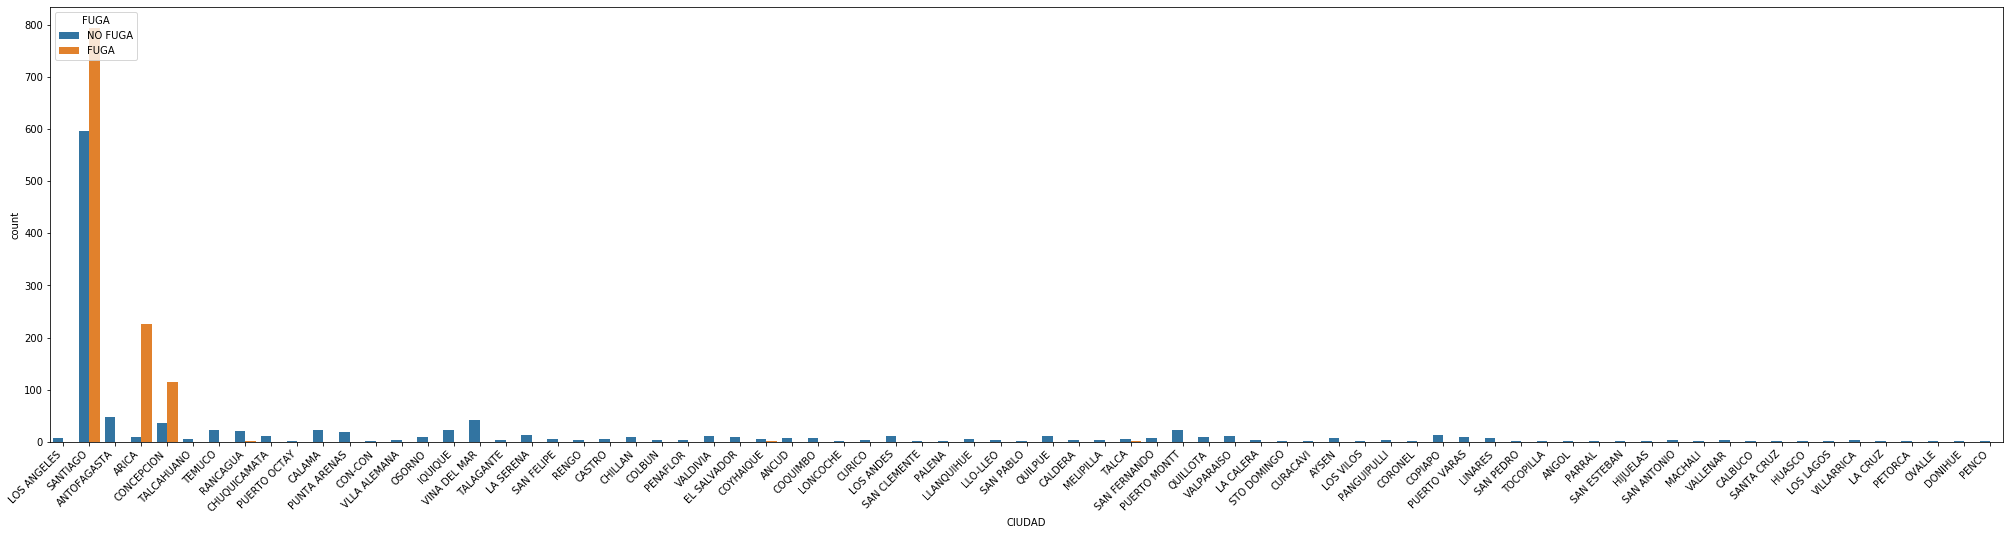

In [0]:
plt.figure(figsize=(35,8))
ax=sns.countplot(x="CIUDAD", hue="FUGA", data=dfTrain)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

## Variable Edad

count   2289.00000
mean      43.65487
std        8.40193
min       23.00000
25%       39.00000
50%       44.00000
75%       50.00000
max      130.00000
Name: EDAD, dtype: float64

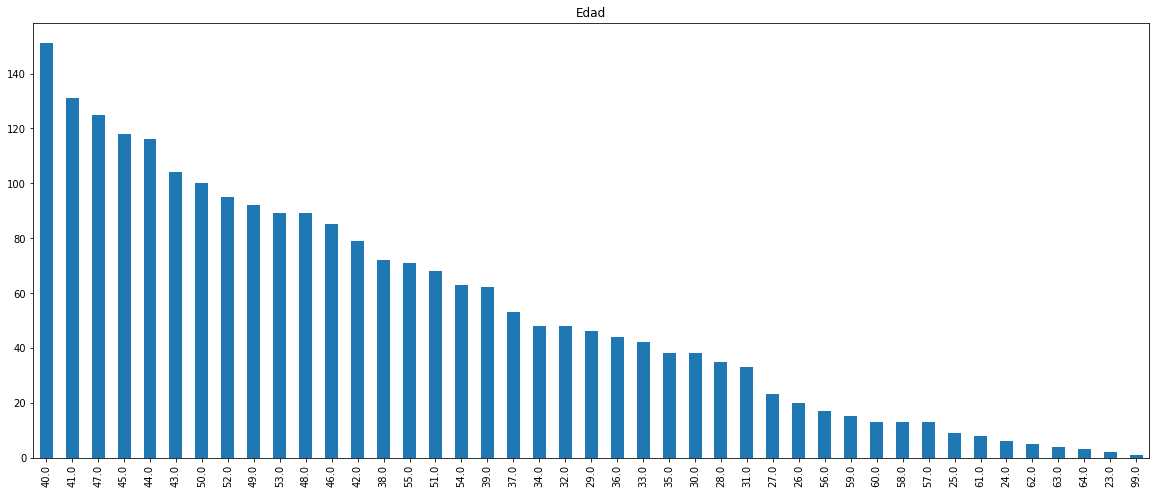

In [0]:
plt.figure(figsize=(20,8))

dfTrain[(dfTrain['EDAD']>0) & (dfTrain['EDAD']<=100)]['EDAD'].value_counts().plot(kind='bar').set_title('Edad')
dfTrain[dfTrain['EDAD']>0 & (dfTrain['EDAD']<=100)]['EDAD'].describe()
#supress scientifc notation from plots
#plt.ticklabel_format(style='plain', axis='x')

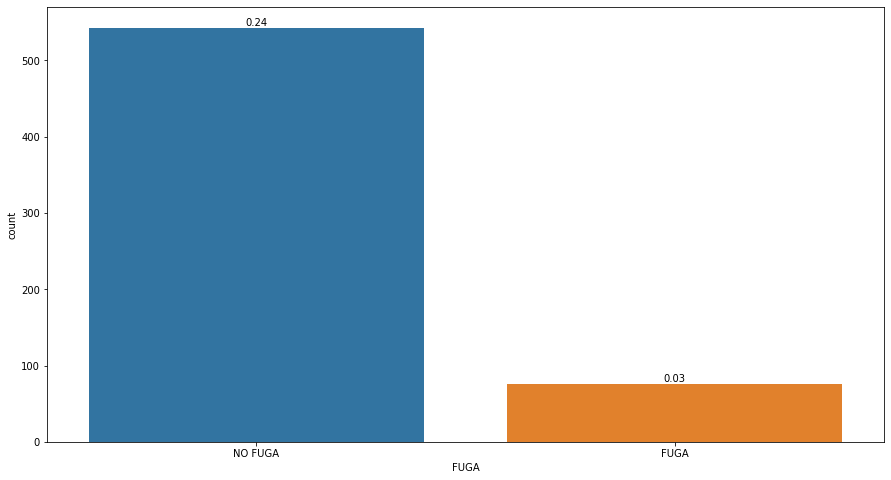

filas: 619


In [0]:
edad_seg1=dfTrain[(dfTrain['EDAD']>0) & (dfTrain['EDAD']<=39)]

plt.figure(figsize=(15,8))
ax=sns.countplot(x="FUGA",  data=edad_seg1)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center") 
plt.show()
print('filas:', len(edad_seg1))

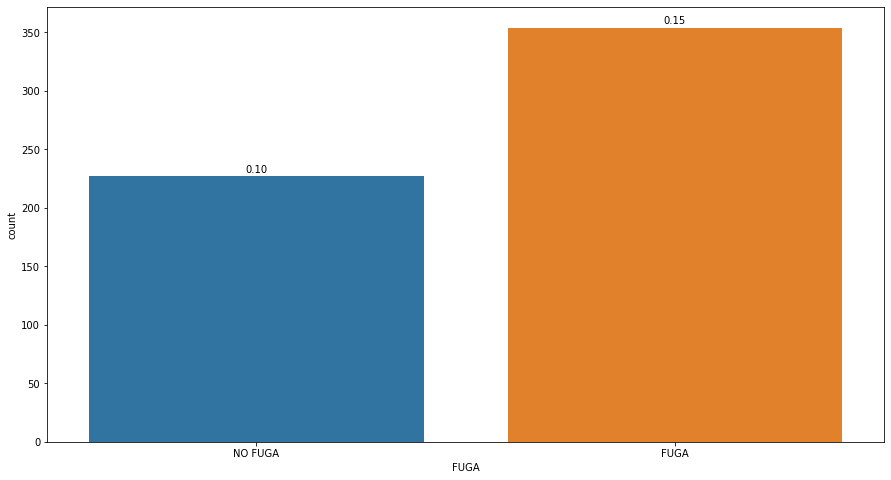

filas: 581


In [0]:
edad_seg2=dfTrain[(dfTrain['EDAD']>39) & (dfTrain['EDAD']<=44)]

plt.figure(figsize=(15,8))
ax=sns.countplot(x="FUGA",  data=edad_seg2)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center") 
plt.show()
print('filas:', len(edad_seg2))

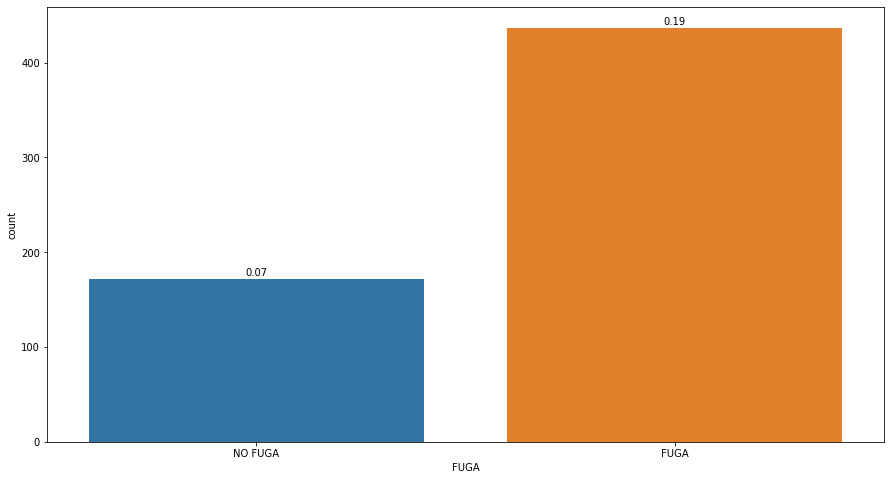

filas: 609


In [0]:
edad_seg3=dfTrain[(dfTrain['EDAD']>44) & (dfTrain['EDAD']<=50)]

plt.figure(figsize=(15,8))
ax=sns.countplot(x="FUGA",  data=edad_seg3)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center") 
plt.show()
print('filas:', len(edad_seg3))

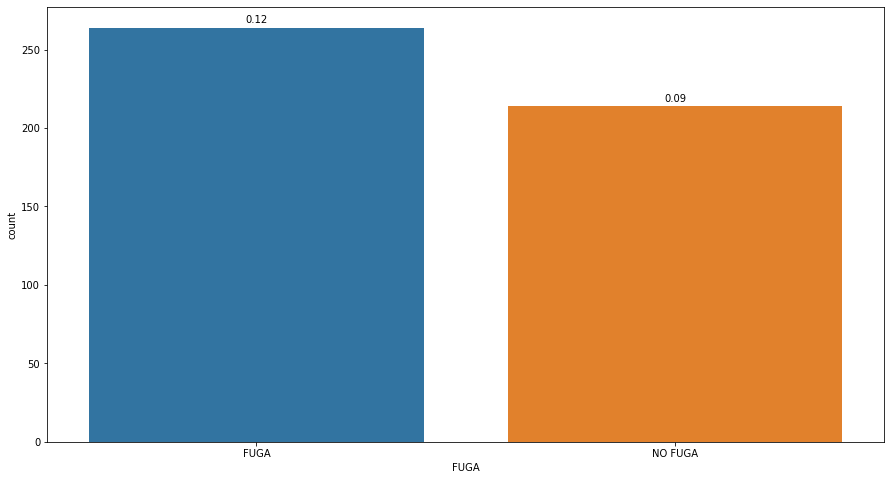

filas: 478


In [0]:
edad_seg4=dfTrain[(dfTrain['EDAD']>50) & (dfTrain['EDAD']<=100)]

plt.figure(figsize=(15,8))
ax=sns.countplot(x="FUGA",  data=edad_seg4)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center") 
plt.show()
print('filas:', len(edad_seg4))

In [0]:
dfTrain.dropna(inplace = True) 

# percentile list 
perc =[.10, .20, .30, .40, .50, .60, .70, .80, .90] 
  
# list of dtypes to include 
include =['object', 'float', 'int'] 
  
# calling describe method 
desc = dfTrain.describe(percentiles = perc, include = include) 
  
# display 
print(desc )

# Sirve para MLP / Regresiones


dfDummies = pd.get_dummies(dfTrain, columns=['SEGURO', 'GENERO', 'NIV_EDUC_COD', 'E_CIVIL_COD' ])

print(dfDummies.head())

In [0]:
dfDummies.head()

In [0]:
dfDummies['FUGA'].value_counts()




In [0]:


dfTrain['NIV_EDUC'].value_counts()

# dfDummies['CIUDAD'].value_counts() --- Analizar si se incluye o no?



In [0]:
dfTrain['E_CIVIL'].value_counts()

# Hay que agrupar Soltero/Sep/Viudos

In [0]:

dfDummies.to_csv('file_preprocessed.csv')